In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from breakthrough import *
from tqdm import tqdm

Version:  0.2.19


In [6]:
W=[]
L=[]
T=[]

n=[]
games_per_epoch=100
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # train with learning
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(random_agent,random_agent)
    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0
    
    total_games+=g.number_of_games
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    
    #print('%.2f' % percent_wins," ",end="")

100%|██████████| 100/100 [00:31<00:00,  3.22it/s]


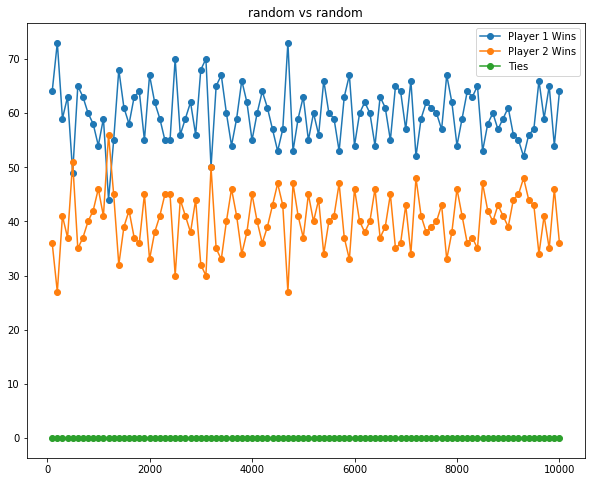

In [7]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('random vs random')
legend()

In [8]:
def Q_move(state,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move
    
    if not state in Q:
        Q[state]=Table()
        for action in valid_moves(state,player):
            Q[state][action]=0.0
            
    if random.random()<epsilon:  # random move
        action=random_choice(Q[state])
    else:
        action=top_choice(Q[state])
        
        
    if not last_action is None:  # anything but the first move
        r=0.0
        Q[last_state][last_action]+=alpha*(r + 
            gamma*max([Q[state][a] for a in Q[state]]) -
            Q[last_state][last_action] )
        
    return action

def Q_post(status,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move

    if status=='lose':
        r=-1.0
    elif status=='win':
        r=1.0
    elif status=='stalemate':
        r=0.5
    else:
        r=0.0
        
    if not last_action is None:  # anything but the first move
        Q[last_state][last_action]+=alpha*(r -
            Q[last_state][last_action] )
        

In [9]:
Q1_agent=Agent(Q_move)
Q1_agent.post=Q_post

Q1_agent.Q=Table()
Q1_agent.alpha=0.3  # learning rate
Q1_agent.gamma=0.9  # memory
Q1_agent.epsilon=0.1  # chance of making a random move

Q2_agent=Agent(Q_move)
Q2_agent.post=Q_post

Q2_agent.Q=Table()
Q2_agent.alpha=0.3  # learning rate
Q2_agent.gamma=0.9  # memory
Q2_agent.epsilon=0.1  # chance of making a random move

In [10]:
Q1_agent.Q=Table()
Q2_agent.Q=Table()

W=[]
L=[]
T=[]

n=[]
games_per_epoch=1
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # ramp down the randomness over time
    epsilon=1-epoch/number_of_epochs_to_explore
    if epsilon<0:
        epsilon=0
    
    
    # train with learning
    Q1_agent.epsilon=epsilon
    Q1_agent.alpha=0.3
    Q2_agent.epsilon=epsilon
    Q2_agent.alpha=0.3
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    # test with no learning
    Q1_agent.epsilon=0.0
    Q1_agent.alpha=0.0
    Q2_agent.epsilon=0.0
    Q2_agent.alpha=0.0
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(random_agent,Q2_agent)    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0

    total_games+=games_per_epoch
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    
    #print('%.2f' % percent_wins," ",end="")

100%|██████████| 100/100 [00:30<00:00,  3.29it/s]


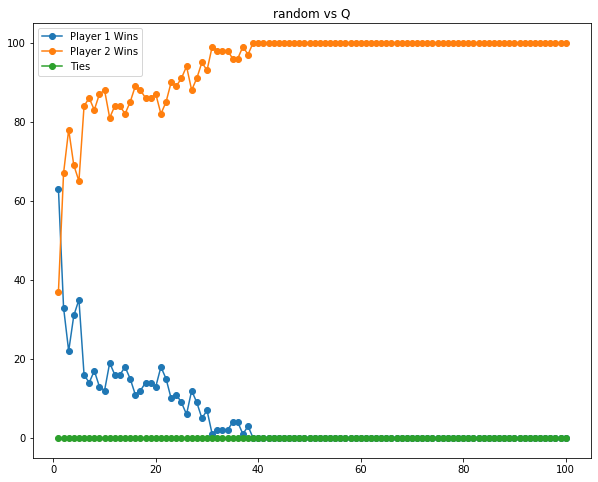

In [11]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('random vs Q')
legend()

In [12]:
print(g.run(Q1_agent,minimax_agent))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [13]:
print(g.run(minimax_agent,Q2_agent))

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [14]:
print(g.run(minimax_agent,random_agent))

[1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1]


In [15]:
print(g.run(Q1_agent,random_agent))

[2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1]


In [18]:
Q1_agent.Q=Table()
Q2_agent.Q=Table()

W=[]
L=[]
T=[]

n=[]
games_per_epoch=1
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # ramp down the randomness over time
    epsilon=1-epoch/number_of_epochs_to_explore
    if epsilon<0:
        epsilon=0
    
    
    # train with learning
    Q1_agent.epsilon=epsilon
    Q1_agent.alpha=0.3
    Q2_agent.epsilon=epsilon
    Q2_agent.alpha=0.3
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    # test with no learning
    Q1_agent.epsilon=0.0
    Q1_agent.alpha=0.0
    Q2_agent.epsilon=0.0
    Q2_agent.alpha=0.0
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(minimax_agent,Q2_agent)    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0

    total_games+=games_per_epoch
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    #print('%.2f' % percent_wins," ",end="")

100%|██████████| 100/100 [00:35<00:00,  2.81it/s]


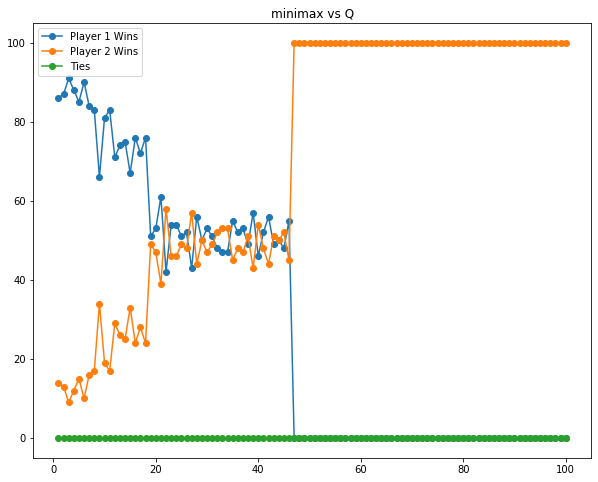

In [19]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('minimax vs Q')
legend()

## Can we do the same with a neural network?

### First we need some functions

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from breakthrough import *
from tqdm import tqdm

Version:  0.2.19


In [3]:
from nn import NNTable

In [4]:
def all_possible_moves():
    all_moves=[]
    for start in range(9):
        for end in range(9):
            move=[start,end]
            all_moves.append(move)
            
    return all_moves

def state_to_X(state):  # this works for ints (like Nim)
    import numpy as np
    N2=len(state)
    arr=np.zeros((1,N2))
    for i in range(N2):
        if state[i]==0:
            arr[0,i]=0
        elif state[i]==1:
            arr[0,i]=1
        elif state[i]==2:
            arr[0,i]=-1
                     
    return arr

In [5]:
print(all_possible_moves())

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [1, 0], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [1, 7], [1, 8], [2, 0], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [2, 7], [2, 8], [3, 0], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8], [4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [5, 0], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [5, 7], [5, 8], [6, 0], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6], [6, 7], [6, 8], [7, 0], [7, 1], [7, 2], [7, 3], [7, 4], [7, 5], [7, 6], [7, 7], [7, 8], [8, 0], [8, 1], [8, 2], [8, 3], [8, 4], [8, 5], [8, 6], [8, 7], [8, 8]]


In [6]:
state=initial_state()
print(state)
print(state_to_X(state))

 v  v  v 
 .  .  . 
 ^  ^  ^ 

[[-1. -1. -1.  0.  0.  0.  1.  1.  1.]]


In [7]:
def QNN_move(state,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move
    
    new_state=state
    new_actual_moves=valid_moves(new_state,player)
    new_action_values=Q[new_state]
    new_values=[new_action_values[move] for move in new_actual_moves] 
    
    if random.random()<epsilon:  # random move
        action=random_choice(new_actual_moves)
    else:
        action=top_choice(new_actual_moves,weights=new_values)
            
            
#         # Ask the model for the Q values of the old state (inference)
#         old_state_Q_values = self.get_Q(old_state)

#         # Ask the model for the Q values of the new state (inference)
#         new_state_Q_values = self.get_Q(new_state)

#         # Real Q value for the action we took. This is what we will train towards.
#         old_state_Q_values[action] = reward + self.discount * np.amax(new_state_Q_values)
        
    if alpha==0:  # no learning
        return action

    if not last_action is None:  # anything but the first move
        r=0.0  # no reward middle of game
        possible_moves=Q.all_moves
        
        old_state=last_state

        old_actual_moves=valid_moves(old_state,player)
        old_action_values=Q[old_state]
        old_values=[old_action_values[move] for move in old_actual_moves] 
        
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==last_action:
                target.append(r + gamma*max(new_values))  # max of actually available values
            elif move in old_actual_moves:  # keep the old values for valid moves
                target.append(old_action_values[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[old_state]=target
        
    return action

def QNN_post(status,player,info):
    Q=info.Q
    last_action=info.last_action
    last_state=info.last_state
    
    alpha=info.alpha  # learning rate
    gamma=info.gamma  # memory 
    epsilon=info.epsilon  # probability of doing random move

    if alpha==0.0:  # no update if not learning
        return
    
    if status=='lose':
        r=-1.0
    elif status=='win':
        r=1.0
    elif status=='stalemate':
        r=0.5
    else:
        r=0.0
        
    if not last_action is None:  # anything but the first move
        possible_moves=Q.all_moves
        old_state=last_state

        old_actual_moves=valid_moves(old_state,player)
        old_action_values=Q[old_state]
        old_values=[old_action_values[move] for move in old_actual_moves] 
        
        
        target=[]
        for i,move in enumerate(possible_moves):
            if move==last_action:
                target.append(r)  # just the reward
            elif move in old_actual_moves:  # keep the old values for valid moves
                target.append(old_action_values[move])
            else:
                target.append(-1)  # lose with illegal move

        Q[old_state]=target


In [8]:
Q1_agent=Agent(QNN_move)
Q1_agent.post=QNN_post

Q1_agent.alpha=0.03  # learning rate
Q1_agent.gamma=0.9  # memory
Q1_agent.epsilon=0.1  # chance of making a random move

Q1_agent.original_alpha=Q1_agent.alpha

Q2_agent=Agent(QNN_move)
Q2_agent.post=QNN_post

Q2_agent.alpha=0.03  # learning rate
Q2_agent.gamma=0.9  # memory
Q2_agent.epsilon=0.1  # chance of making a random move

Q2_agent.original_alpha=Q2_agent.alpha


In [9]:
Q1_agent.Q=NNTable(state_to_X,all_possible_moves(),
                    hidden_layer_sizes=(10,),
                    activation='tanh',
                    save_data=True,
                    learning_rate=Q1_agent.original_alpha,
                   initial_weight_factor=0.1)
Q2_agent.Q=NNTable(state_to_X,all_possible_moves(),
                    hidden_layer_sizes=(10,),
                    activation='tanh',
                    save_data=True,
                    learning_rate=Q2_agent.original_alpha,
                   initial_weight_factor=0.1)

state=initial_state()
Q1_agent.Q[state]=[0]*len(all_possible_moves())
Q2_agent.Q[state]=[0]*len(all_possible_moves())


In [10]:
Q2_agent.Q[state]

{(0, 0): 0.007813731685318247,
 (0, 1): -0.012740048148824146,
 (0, 2): 0.007237386531077258,
 (0, 3): 0.027080944953419804,
 (0, 4): 0.02152631830003931,
 (0, 5): 0.0031478896855046843,
 (0, 6): 0.01851250177304007,
 (0, 7): 0.01515844304748786,
 (0, 8): -0.004375418301237553,
 (1, 0): -0.003332621450508581,
 (1, 1): -0.025707519212088796,
 (1, 2): -0.008309557809663502,
 (1, 3): -0.025556587054957215,
 (1, 4): 0.012226884984364063,
 (1, 5): -0.006012980234501561,
 (1, 6): 0.0018593252083181533,
 (1, 7): 0.01303889872556191,
 (1, 8): -0.005411354236964767,
 (2, 0): -0.006707930628383479,
 (2, 1): -0.0031686084052350034,
 (2, 2): -0.0169054031013953,
 (2, 3): -0.007865732755824953,
 (2, 4): -0.02649606797652004,
 (2, 5): -0.006961430079233999,
 (2, 6): 0.003864684207518199,
 (2, 7): 0.03528297046707726,
 (2, 8): -0.015149098615063169,
 (3, 0): 0.002671513332635978,
 (3, 1): -0.011272086507457332,
 (3, 2): 0.017255109382297157,
 (3, 3): -0.025674559174472273,
 (3, 4): -0.028500478259210

In [14]:
Q1_agent.original_alpha=0.05
Q2_agent.original_alpha=0.05

Q1_agent.Q=NNTable(state_to_X,all_possible_moves(),
                    hidden_layer_sizes=(20,),
                    activation='tanh',
                    save_data=True,
                    learning_rate=Q1_agent.original_alpha,
                   initial_weight_factor=0.1)
Q2_agent.Q=NNTable(state_to_X,all_possible_moves(),
                    hidden_layer_sizes=(20,),
                    activation='tanh',
                    save_data=True,
                    learning_rate=Q2_agent.original_alpha,
                   initial_weight_factor=0.1)

state=initial_state()
Q1_agent.Q[state]=[0]*len(all_possible_moves())
Q2_agent.Q[state]=[0]*len(all_possible_moves())


W=[]
L=[]
T=[]

n=[]
games_per_epoch=100
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # ramp down the randomness over time
    epsilon=1-epoch/number_of_epochs_to_explore
    if epsilon<0:
        epsilon=0
    
    
    # train with learning
    Q1_agent.epsilon=epsilon
    Q1_agent.alpha=Q1_agent.original_alpha
    Q2_agent.epsilon=epsilon
    Q2_agent.alpha=Q2_agent.original_alpha
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    # test with no learning
    Q1_agent.epsilon=0.0
    Q1_agent.alpha=0.0
    Q2_agent.epsilon=0.0
    Q2_agent.alpha=0.0
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(random_agent,Q2_agent)    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0

    total_games+=games_per_epoch
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    
    #print('%.2f' % percent_wins," ",end="")

100%|██████████| 100/100 [04:46<00:00,  2.87s/it]


In [15]:
print(Q1_agent.Q[initial_state()])

{(0, 0): 2.8531097484131934e+38, (0, 1): 5.6251643994362e+38, (0, 2): 1.3668992665218644e+38, (0, 3): 3.1612385649138348e+38, (0, 4): 1.060974359996305e+38, (0, 5): 1.8328691110985235e+38, (0, 6): 9.868639554701712e+37, (0, 7): 5.507630952074258e+37, (0, 8): 5.970687955627814e+37, (1, 0): 2.0454267457044586e+38, (1, 1): 4.011092853151344e+38, (1, 2): 3.906622443812706e+37, (1, 3): -1.1902316853977822e+38, (1, 4): 2.2311816981822765e+38, (1, 5): -5.719596919223857e+35, (1, 6): 1.919842069568084e+37, (1, 7): 3.512122166068877e+38, (1, 8): 6.666469238059533e+36, (2, 0): 7.382170101134643e+37, (2, 1): -9.261102526825609e+36, (2, 2): -1.1315883100004287e+37, (2, 3): 1.7370813072261732e+38, (2, 4): 8.818438566586664e+37, (2, 5): 2.360118010851528e+38, (2, 6): -3.614147332265177e+37, (2, 7): 3.056325937198353e+38, (2, 8): 5.791945375427747e+36, (3, 0): 1.1774911023811264e+38, (3, 1): -5.052155723115544e+35, (3, 2): 1.963760929660167e+38, (3, 3): -6.107275372902125e+37, (3, 4): 2.2355099951916

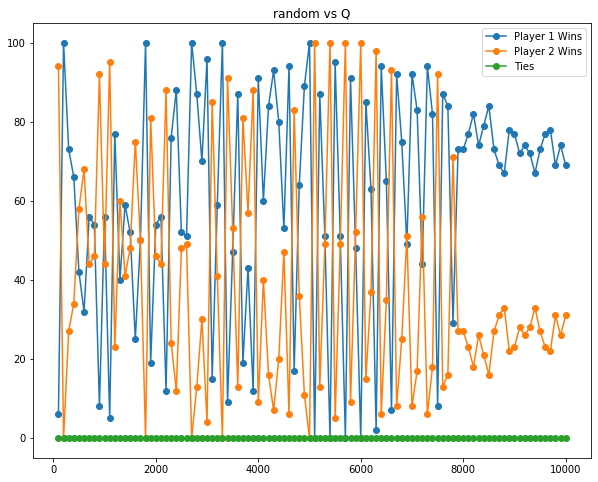

In [16]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('random vs Q')
legend()

In [18]:
Q1_agent.original_alpha=0.02
Q2_agent.original_alpha=0.02

Q1_agent.Q=NNTable(state_to_X,all_possible_moves(),
                    hidden_layer_sizes=(20,),
                    activation='tanh',
                    save_data=True,
                    learning_rate=Q1_agent.original_alpha,
                   initial_weight_factor=0.1)
Q2_agent.Q=NNTable(state_to_X,all_possible_moves(),
                    hidden_layer_sizes=(20,),
                    activation='tanh',
                    save_data=True,
                    learning_rate=Q2_agent.original_alpha,
                   initial_weight_factor=0.1)

state=initial_state()
Q1_agent.Q[state]=[0]*len(all_possible_moves())
Q2_agent.Q[state]=[0]*len(all_possible_moves())


W=[]
L=[]
T=[]

n=[]
games_per_epoch=1000
number_of_epochs=100
number_of_epochs_to_explore=50
total_games=0

for epoch in tqdm(range(number_of_epochs)):
    
    # ramp down the randomness over time
    epsilon=1-epoch/number_of_epochs_to_explore
    if epsilon<0:
        epsilon=0
    
    
    # train with learning
    Q1_agent.epsilon=epsilon
    Q1_agent.alpha=Q1_agent.original_alpha
    Q2_agent.epsilon=epsilon
    Q2_agent.alpha=Q2_agent.original_alpha
    g=Game(number_of_games=games_per_epoch)
    g.display=False
    result=g.run(Q1_agent,Q2_agent)

    # test with no learning
    Q1_agent.epsilon=0.0
    Q1_agent.alpha=0.0
    Q2_agent.epsilon=0.0
    Q2_agent.alpha=0.0
    g=Game(number_of_games=100)
    g.display=False
    
    result=g.run(random_agent,Q2_agent)    
    percent_wins=sum([_==1 for _ in result])/len(result)*100
    percent_losses=sum([_==2 for _ in result])/len(result)*100
    percent_ties=sum([_==0 for _ in result])/len(result)*100
    percent_broken=sum([_==3 for _ in result])/len(result)*100
    
    assert percent_broken==0.0

    total_games+=games_per_epoch
    
    
    n.append(total_games)
    W.append(percent_wins)
    L.append(percent_losses)
    T.append(percent_ties)
    
    #print('%.2f' % percent_wins," ",end="")


100%|██████████| 100/100 [44:00<00:00, 26.41s/it]


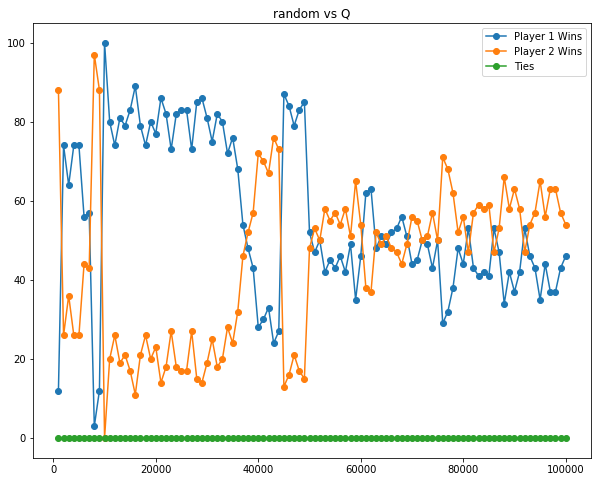

In [19]:
figure(figsize=(10,8))
plot(n,W,'-o',label='Player 1 Wins')
plot(n,L,'-o',label='Player 2 Wins')
plot(n,T,'-o',label='Ties')
title('random vs Q')
legend()